# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [2]:
### YOUR CODE HERE ###

# Standard operational package imports
import pandas as pd
import numpy as np
# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
## Metrics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns



## 
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df_original = pd.read_csv("~/Scripts/DS/MachineLearning/data/Invistico_Airline.csv")

### Output the first 10 rows of data

In [4]:
### YOUR CODE HERE ###
df_original.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [5]:
### YOUR CODE HERE ###
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [6]:
### YOUR CODE HERE ###
objs = df_original.select_dtypes(['object']).columns
nums = df_original.select_dtypes(['int64', 'float64']).columns

for ele in objs:
    print(f'Columns: {ele}: \n{df_original[ele].unique()}, \nN-elements: {len(df_original[ele].unique())}\n')

Columns: satisfaction: 
['satisfied' 'dissatisfied'], 
N-elements: 2

Columns: Customer Type: 
['Loyal Customer' 'disloyal Customer'], 
N-elements: 2

Columns: Type of Travel: 
['Personal Travel' 'Business travel'], 
N-elements: 2

Columns: Class: 
['Eco' 'Business' 'Eco Plus'], 
N-elements: 3



### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [9]:
### YOUR CODE HERE ###
for colu in objs:
    print(df_original[colu].value_counts())#normalize=True))
    #sns.countplot(df_original[colu])
    #plt.show()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64


**Question:** How many satisfied and dissatisfied customers were there?

* satisfied: $71087$

* dissatisfied:  $58793$

**Question:** What percentage of customers were satisfied? 

* satisfied       $54.73\%$
* dissatisfied    $45.26\%$

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [10]:
### YOUR CODE HERE ###
invalid_list =\
    [np.nan, None, [], {}, 'NaN', 'Null','NULL'\
     ,'None','NA','?','-', '--','.','', ' ', '   ']
    
invalids = []
uniques = []
result = pd.DataFrame({
        'nulls': df_original.isnull().sum(),
    })
for c in df_original.columns:
        invalids.append(df_original[c].isin(invalid_list).sum())
        uniques.append(df_original[c].unique())
result['invalids'] = invalids
result['unique_item'] = uniques
result.head(len(df_original.columns))

,nulls,invalids,unique_item
satisfaction,0,0,"[satisfied, dissatisfied]"
Customer Type,0,0,"[Loyal Customer, disloyal Customer]"
Age,0,0,"[65, 47, 15, 60, 70, 30, 66, 10, 56, 22, 58, 3..."
Type of Travel,0,0,"[Personal Travel, Business travel]"
Class,0,0,"[Eco, Business, Eco Plus]"
Flight Distance,0,0,"[265, 2464, 2138, 623, 354, 1894, 227, 1812, 7..."
Seat comfort,0,0,"[0, 1, 4, 5, 2, 3]"
Departure/Arrival time convenient,0,0,"[0, 1, 2, 3, 4, 5]"
Food and drink,0,0,"[0, 1, 2, 3, 4, 5]"
Gate location,0,0,"[2, 3, 4, 1, 5, 0]"


**Question:** Why is it important to check how many rows and columns there are in the dataset?

If we are preforming statistical analysis, the number of examples is the number of samples $n$. $n$ is used for multiple calculations. 

The average can not be obtained with out understanding the number of measurements. 

The features or characteristic of our data is encoded and enumerated. 
the "columns" quantify certain aspects of the data.
Knowing this help us understand and have a good foundation for what may be next.

Also knowing  and understanding what we have,allows to determinate if we may keep or not examples 
or if a characteristic have power to predict.

This knowledge will help to determinate what processes we may take or not.



### Check the number of rows and columns in the dataset

In [11]:
### YOUR CODE HERE ###
df_original.shape

(129880, 22)

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [12]:
### YOUR CODE HERE ###
df_original.dropna(inplace=True)
df_subset = df_original.copy()

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [26]:
### YOUR CODE HERE ###
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [22]:
### YOUR CODE HERE ###
df_subset.shape#[0] - 129880
objs

Index(['satisfaction', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [23]:
### YOUR CODE HERE ###
satisfactionMap = {'satisfied': 1, 'dissatisfied': 0}
customerTypeMap = {'Loyal Customer': 1, 'disloyal Customer':0}
typeTraveMap    = {'Personal Travel':1, 'Business travel':0}
classType = {'Eco':1,  'Business':2,  'Eco Plus':0}


df_subset['satisfaction'] = df_subset['satisfaction'].apply(lambda x : satisfactionMap[x])
df_subset['Customer Type'] = df_subset['Customer Type'].apply(lambda x : customerTypeMap[x])
df_subset['Type of Travel'] = df_subset['Type of Travel'].apply(lambda x : typeTraveMap[x])
df_subset['Class'] = df_subset['Class'].apply(lambda x : classType[x])

KeyError: 1

### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [24]:
### YOUR CODE HERE ###
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Customer Type                      129487 non-null  int64  
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  int64  
 4   Class                              129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [25]:
### YOUR CODE HERE ###

for col in df_subset.columns:
    print(col, df_subset[col].dtype)

satisfaction int64
Customer Type int64
Age int64
Type of Travel int64
Class int64
Flight Distance int64
Seat comfort int64
Departure/Arrival time convenient int64
Food and drink int64
Gate location int64
Inflight wifi service int64
Inflight entertainment int64
Online support int64
Ease of Online booking int64
On-board service int64
Leg room service int64
Baggage handling int64
Checkin service int64
Cleanliness int64
Online boarding int64
Departure Delay in Minutes int64
Arrival Delay in Minutes float64


### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [27]:
### YOUR CODE HERE ###
df_subset.info()
#df_subset.to_csv("airlinesClean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129487 non-null  int64  
 1   Customer Type                      129487 non-null  int64  
 2   Age                                129487 non-null  int64  
 3   Type of Travel                     129487 non-null  int64  
 4   Class                              129487 non-null  int64  
 5   Flight Distance                    129487 non-null  int64  
 6   Seat comfort                       129487 non-null  int64  
 7   Departure/Arrival time convenient  129487 non-null  int64  
 8   Food and drink                     129487 non-null  int64  
 9   Gate location                      129487 non-null  int64  
 10  Inflight wifi service              129487 non-null  int64  
 11  Inflight entertainment             1294

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [19]:
y = df_subset.iloc[:,1]
X = df_subset.iloc[:,2:] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [24]:
### YOUR CODE HERE ###

## Make a decision tree instance
decision_tree = DecisionTreeClassifier(random_state=0)

## Fit the model on the training set
decision_tree.fit(X_train, y_train)

## Use the predict() on the testing set. Assign those predictions to a variable.
dt_pred = decision_tree.predict(X_test)

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

Decision tree Assumptions are not the same than other models. Concequentenly every model has its time and place.
Decision tree assumes that the data can be splited into subsets based on the values of the input features.

Some of the advantajes are that normality of the data is not crucial (comparating logistic regression).

It is somehow easier to follow the algorithm as its arquitecture uses logic.

It works well with categorical and continious data.

WOW! (after Observing the classification_report())

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [25]:
### YOUR CODE HERE ###
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5929
           1       0.98      0.98      0.98     26443

    accuracy                           0.97     32372
   macro avg       0.95      0.95      0.95     32372
weighted avg       0.97      0.97      0.97     32372



**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

Yes, we could adjust some of the hyperparameters like this using `GridSearch()`:
1. Create a dictionary of the parameters to adjust and values as a list of options.

```
decision_tree_parameters = {
            'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50],
            'min_samples_leaf': [2, 5, 10, 20, 50],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": ["auto", "sqrt", "log2"],

            
}
```

2. Select the metrics

```
scoring = {'accuracy', 'precision', 'recall', 'f1'}
```

3. Instantiate the classifier

```
tuned_decision_tree = DecisionTreeClassifier(random_state=42)
```

4. Instantiate the GridSearchCV object and Pass as arguments, and fit

```
clf = GridSearchCV(
                   tuned_decision_tree, 
                   decision_tree_parameters, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")
                   
clf.fit(X_train, y_train)
```


### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

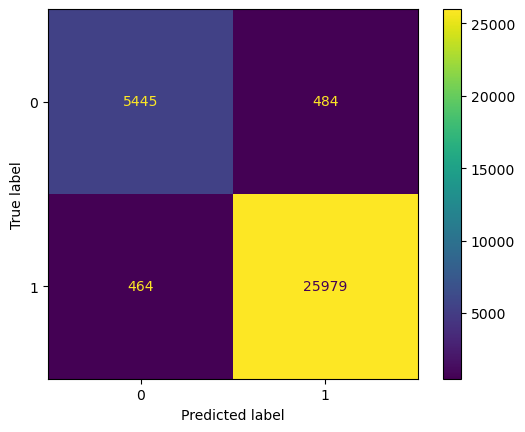

In [26]:
### YOUR CODE HERE ###

## Make a decision tree instance
decision_tree = DecisionTreeClassifier(random_state=0)

## Fit the model on the training set
decision_tree.fit(X_train, y_train)

## Using the predict() on the testing set. 
## & Assign those predictions to a variable.
dt_pred = decision_tree.predict(X_test)

cm = confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=decision_tree.classes_,
                                 )
  
disp.plot(values_format='') 
plt.show();

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

**TP:** 5X TN

**TN:** are aproximatelly 20% of TP


**FP:** pretty equal to FN 

**FN:**

Model is pretty balance, although it ability to predict disatisfaction a around 5% less that to predict satisfaction.

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

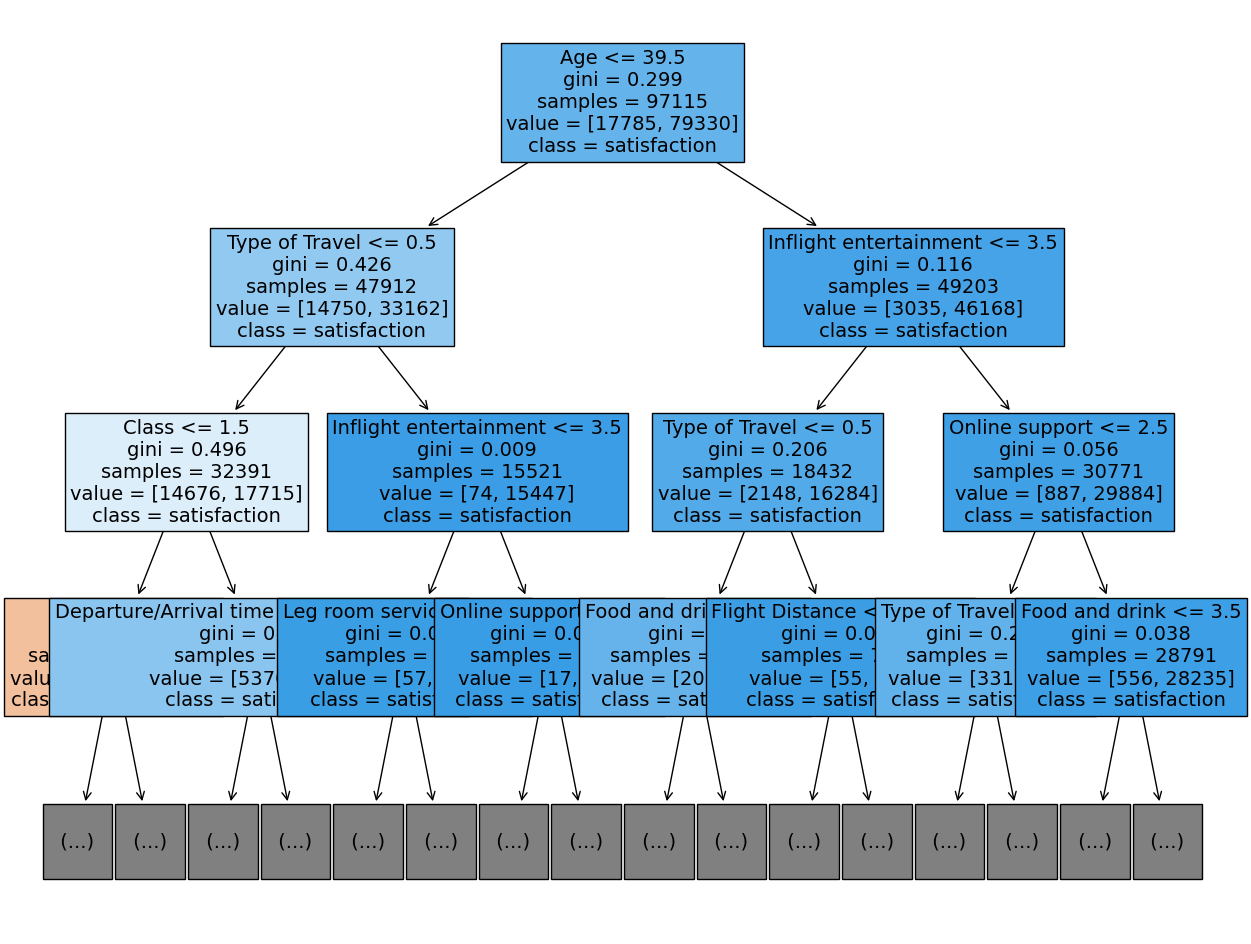

In [27]:
### YOUR CODE HERE ###

plt.figure(figsize=(15,12))
plot_tree(decision_tree, max_depth=3, fontsize=14, feature_names=X.columns, 
          class_names={0:'disatisfaction', 1:'satisfaction'}, filled=True);
plt.show()

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [28]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [29]:
### YOUR CODE HERE ###
## Parameters
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {'accuracy', 'precision', 'recall', 'f1'}

## Instantiate the classifier
tuned_decision_tree = DecisionTreeClassifier(random_state=42)
## Instantiate the GridSearchCV object and Pass as arguments, and fit
clf = GridSearchCV(
                   tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1', scoring={'accuracy', 'f1', 'precision', 'recall'})

**Question:** How can you determine the best combination of values for the hyperparameters? 

Each Metric may have a best hyperparameter selection, but
Not all Metrics may have the same hyperparameters selection at the same time.
Depending on what are we interested, we should select the `refit` to and score and score the rest
based on the parameters that make the selected refit meassurement method.

### Compute the best combination of values for the hyperparameters

In [ ]:
### YOUR CODE HERE ###
best_params = clf.best_params_
print(best_params)
print(f'BestScore: {round(clf.best_score_, 3)}')


**Question:** What is the best combination of values for the hyperparameters? 

in this case:

` {
'max_depth': 30, 
'min_samples_leaf': 7
}`

<strong> Question: What was the best average validation score? </strong>

Best Avg. Validation Score: `clf.best_score_`

In [ ]:
### YOUR CODE HERE ###
## Best Avg. Validation Score: `clf.best_score_`

print(f'BestScore: {round(clf.best_score_, 3)}')

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [ ]:
## Make a decision tree instance
decision_tree2 = DecisionTreeClassifier(**best_params, random_state=0)

## Fit the model on the training set
decision_tree2.fit(X_train, y_train)

## Use the predict() on the testing set. Assign those predictions to a variable.
dt_pred2 = decision_tree2.predict(X_test)

In [ ]:
### YOUR CODE HERE ###
print(classification_report(y_test, dt_pred2))

In [ ]:
cm = confusion_matrix(y_test, dt_pred2, labels=decision_tree2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=decision_tree2.classes_,
                                 )
  
disp.plot(values_format='') 
plt.show();

In [ ]:
### YOUR CODE HERE

results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = table.append({'Model': model_name,
                        'F1': f1,
                        'Recall': recall,
                        'Precision': precision,
                        'Accuracy': accuracy
                        },
                        ignore_index=True
                       )
  
    return table

## Calling the function on model
result_table = make_results('tunedDecisionTree', clf)
## result_table.to_csv("Results.csv", index=False)
result_table


**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

Yes, It. Overall the ability of the model of capture false positive and false negative increased.
Recall increased a point.

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

In [ ]:
### YOUR CODE HERE ###
plt.figure(figsize=(15,12))
plot_tree(decision_tree2, max_depth=3, fontsize=12, feature_names=X.columns, 
          class_names={0:'disatisfaction', 1:'satisfaction'}, filled=True);
plt.show()

Which features did the model use first to sort the samples?

In [ ]:
importances = clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

**Question:** What do you think is the most important metric in this business case?

Any of the metrics in this business case could be considered important, depending on what the stakeholder or domain expert cares about. The following are reasons why each metric is important: 

- Accuracy tends to be the metric that the stakeholders can best understand.

- Precision measures what proportion of predicted positives is truly positive. For example, if you wanted to not falsely claiming a customer is satisfied, precision would be a good metric. Assuming a customer is happy when they are really not might lead to customer churn. 

- Recall measures the percentage of actual positives a model correctly identified (true positive). For this dataset, the airline might want to limit false negatives (actually satisfied people who are predicted to be unsatisfied). Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve the customer experience of an already happy customer. 

- F1 balances precision and recall. It is the harmonic mean of precision and recall, or their product divided by their sum.

## Considerations

**What are some key takeaways that you learned from this lab?**
*   Machine learning workflows may be used to clean and encode data for machine learning.
*   While hyperparameter tuning can lead to an increase in performance, it doesn't always. 
*   The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.


**What findings would you share with others?**
*   Decision trees accurately predicted satisfaction over 94 percent of the time.  
*   The confusion matrix is useful as it shows a similar number of true positives and true negatives. 
*   The visualization of the decision tree and the feature importance graph both suggest that `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'` are the most important features in the model.

**What would you recommend to stakeholders?**
*  Customer satisfaction is highly tied to `'Inflight entertainment'`, `'Seat comfort'`, and `'Ease of Online booking'`. Improving these experiences should lead to better customer satisfaction. 
*  The success of the model suggests that the airline should invest more effort into model building and model understanding since this model semed to be very good at predicting customer satisfaction. 

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged